# RNN-Based Irrigation Prediction System for Smart Agriculture

This notebook presents the development of a smart irrigation prediction system using Recurrent Neural Networks (RNN). The goal is to predict irrigation requirements based on time-series environmental data such as temperature, humidity, Evapotranspiratio, Crop type, Coefficient cultural Kc and rainfall.

The notebook is structured to guide the reader through:


**1. Problem Definition:** Addressing challenges in traditional irrigation and the need for intelligent water management.

**2. Dataset Overview:** Description of input features, data sources, and preprocessing techniques.

**3. Data Visualization & Analysis:**  Exploratory Data Analysis (EDA) to understand trends and patterns in environmental data.

**4. Model Development**: Building and training an RNN-based model (Simple RNN / LSTM / GRU) for predicting future irrigation needs.

**5. Model Evaluation:** Assessing performance using metrics such as MSE, RMSE, and accuracy of predicted irrigation levels.

**6. Real-time Integration Perspective:** How this model could be deployed in IoT-based smart agriculture systems.

**7. Conclusion & Future Enhancements:** Summary of results and possible improvements like attention mechanism or hybrid models.

# 1. Problem Definition


Traditional irrigation methods often rely on fixed schedules or manual decisions by farmers, without considering real-time environmental conditions or crop water requirements. This can lead to:

- **Over-irrigation**, causing water waste, soil degradation, and nutrient loss.  
- **Under-irrigation**, which reduces crop yield and affects plant growth.  
- **Inefficient water resource management**, especially in regions facing water scarcity or climate variability.

---

### **Context: Tadla Region, Morocco**

This issue is particularly critical in the **Tadla region of Morocco**, a major agricultural area that suffers from:

- Recurrent droughts  
- Decreasing groundwater levels  
- Inefficient water distribution systems  

Given the agricultural importance of this region, optimizing irrigation is both an **environmental necessity** and an **economic priority**.

---

### **Proposed Solution**

This project proposes a **smart irrigation prediction system using Recurrent Neural Networks (RNNs)**.

The system utilizes **time-series environmental and agricultural data**, including:

- Temperature  
- Humidity  
- Rainfall  
- Evapotranspiration (\(ET_0\))  
- Crop coefficient (\(K_c\))  
- Effective rainfall (\(Pluies\_efficace\))  
- Rayonnement
- Durree Insolation
- DayOfYear

Using this data, the model aims to:

- **Predict irrigation requirements accurately**  
- **Improve water efficiency**  
- **Support data-driven decision-making in smart agriculture**

---



In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# 2. Dataset Overview

###  2.1 Data Collection

The meteorological data used in this project was collected from the **Tadla region of Morocco**, specifically from **three local weather monitoring stations**:


| Station Name     | Location Description |
|------------------|------------------------|
| **Oulad Zidouh** | Agricultural zone, known for cereal and sugar beet production |A
| **Illoul**       | Semi-arid farming area with irrigation-dependent crops |
| **Oulad Ayad**   | Perimeter irrigated by the Tadla canal system |

1. Oulad Zidouh Station





In [8]:

# Read the CSV file
meteo_dar_oulad_zidouh = pd.read_csv("meteo_dar_oulad_zidouh_DATA_1j.dat", header=[1])
meteo_dar_oulad_zidouh= meteo_dar_oulad_zidouh.drop(0)
meteo_dar_oulad_zidouh= meteo_dar_oulad_zidouh.drop(1)
meteo_dar_oulad_zidouh=meteo_dar_oulad_zidouh.reset_index(drop=True)
meteo_dar_oulad_zidouh.head()

,TIMESTAMP,RECORD,Batterie,Temperature,Temperature_Min,Temperature_Max,Humidite,Humidite_Min,Humidite_Max,Vitesse,Direction,Dir_Ecart_type,Rafale,Temps_Rafale,Dir_Rafale,Rayonnement,Durree_Insolation,Pluie,ET0
0,2017-06-05 00:00:00,1,12.95,23.1,16.21,33.03,55.04,22.53,87.9,3.164,249.7,39.35,8.56,2017-06-04 18:13:00,328,30971.7,12.28,0,6.977
1,2017-06-06 00:00:00,2,12.92,23.45,12.9,34.99,47.7,10.27,87.2,2.211,267.1,82.5,9.22,2017-06-05 19:23:00,340,32440.99,12.48,0,7.345
2,2017-06-07 00:00:00,3,12.94,24.95,14.13,36.66,46.88,9.63,89.2,2.052,275.6,77.22,8.45,2017-06-06 17:09:00,328,31518.67,12.33,0,7.179
3,2017-06-08 00:00:00,4,12.95,27.78,14.77,39.69,46.07,17.51,86.5,1.747,181.5,73.71,5.82,2017-06-07 23:20:00,244,25591.38,11.55,0,6.42
4,2017-06-09 00:00:00,5,12.99,28.85,19.46,39.42,41.9,18.42,72.96,2.221,246.3,53.91,9.26,2017-06-08 19:25:00,296,28760.19,12.27,0,7.539


2. Oulad Illoul Station

In [27]:
# Read the CSV file
meteo_oulad_illoul = pd.read_csv("meteo_oulad_illoul_DATA_1j11.dat", header=[1])
meteo_oulad_illoul= meteo_oulad_illoul.drop(0)
meteo_oulad_illoul= meteo_oulad_illoul.drop(1)
meteo_oulad_illoul=meteo_oulad_illoul.reset_index(drop=True)
meteo_oulad_illoul.head()

,TIMESTAMP,RECORD,Batterie,Temperature,Temperature_Min,Temperature_Max,Humidite,Humidite_Min,Humidite_Max,Vitesse,Direction,Dir_Ecart_type,Rafale,Temps_Rafale,Dir_Rafale,Rayonnement,Durree_Insolation,Pluie,ET0
0,2017-12-01 00:00:00,0,12.86,12.31,9.52,16.36,95.8,84.8,99.3,1.771,311.5,86.8,6.56,2017-11-30 10:51:00,222,1582.933,1.083,20.8,0.259
1,2017-12-02 00:00:00,1,12.86,10.99,7.218,15.38,81.2,53.89,99,1.228,42.67,59.3,4.23,2017-12-01 12:13:00,65,5705.135,6.25,0.1,1.075
2,2017-12-03 00:00:00,2,12.99,8.57,1.53,17.07,82.2,39.59,100,0.7,18.83,97.3,2.55,2017-12-02 12:31:00,346,7210.9,7.367,0,1.105
3,2017-12-04 00:00:00,3,12.93,7.499,0.631,16.63,85.9,48.88,100,0.738,80.2,76.43,3.25,2017-12-03 13:21:00,15,6858.468,7.133,0,1.058
4,2017-12-05 00:00:00,4,12.89,8.46,0.53,19,82,39.25,99.9,0.673,95.5,80.1,2.23,2017-12-04 23:33:00,74,6987.543,7.167,0.1,1.098


3. OULED AYAD Station

In [28]:

# Read the CSV file
meteo_OULED_AYAD = pd.read_csv("OULED_AYAD_MTO_DATA_1j.dat", header=[1])
meteo_OULED_AYAD= meteo_OULED_AYAD.drop(0)
meteo_OULED_AYAD= meteo_OULED_AYAD.drop(1)
meteo_OULED_AYAD=meteo_OULED_AYAD.reset_index(drop=True)
meteo_OULED_AYAD.head()

,TIMESTAMP,RECORD,Batterie,Temperature,Temperature_Min,Temperature_Max,Humidite,Humidite_Min,Humidite_Max,Temp_rosee,...,Vitesse,Direction,Dir_Ecart_type,Rafale,Temps_Rafale,Dir_Rafale,Rayonnement,Durree_Insolation,Pluie,ET0
0,2023-03-30 23:59:00,99,12.66,24.34,12.65,35.02,25.66,9.72,48.92,2.142,...,1.072,76.22,96.2,6.12,2023-03-30 13:21:00,123,24166.41,10.67,0,5.302
1,2023-03-31 23:59:00,100,12.59,23.28,11.52,33.86,29.1,9.35,55.91,2.496,...,0.897,54.27,82.4,3.44,2023-03-31 15:31:00,323,24999.62,10.87,0,5.185
2,2023-04-01 23:59:00,101,12.57,21.67,12.26,32.71,38.39,10.65,66.62,4.903,...,1.123,275.4,86.5,4.98,2023-04-01 18:36:00,341,25298.54,10.92,0,5.36
3,2023-04-02 23:59:00,102,12.54,20.84,11.6,31.38,43.37,12.92,70.22,6.045,...,1.154,310.7,94.2,4.09,2023-04-02 15:33:00,157,25395.36,10.98,0,5.188
4,2023-04-03 23:59:00,103,12.58,20.01,11.5,29.95,52.24,11.63,87.4,7.876,...,1.61,246.1,44.97,7.83,2023-04-03 17:32:00,270,25120.74,10.88,0,5.296


 ## 2.2.Dataset Inspection

In [29]:
import pandas as pd
import numpy as np

def inspect_dataset(df, date_col=None):
    """
    Perform a structured inspection of the dataset with clean display.
    - Converts object columns to numeric if possible.
    - Converts a specified date column to datetime.

    Parameters:
    df : pandas.DataFrame
    date_col : str, optional
        Name of the datetime column for time-series continuity check.
    """

    print("=" * 60)
    print("                DATASET INSPECTION REPORT")
    print("=" * 60)

    # ------------------------------------------
    # Data Type Conversion
    # ------------------------------------------
    print("\n[1] Converting Data Types...")
    for col in df.columns:
        # Convert string/object → numeric (if applicable)
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='ignore')

        # Convert date/time column → datetime type
        if date_col and col == date_col:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    print("✔ Data type conversion completed.\n")

    # ------------------------------------------
    # Basic Info
    # ------------------------------------------
    print("[2] Dataset Dimensions")
    print(f"   → Rows    : {df.shape[0]}")
    print(f"   → Columns : {df.shape[1]}")

    print("\n[3] Column Data Types")
    print(df.dtypes)

    # ------------------------------------------
    # Missing Values & Duplicates
    # ------------------------------------------
    print("\n[4] Missing Values per Column")
    print(df.isnull().sum())

    print("\n[5] Duplicate Rows")
    print(df.duplicated().sum())

    # ------------------------------------------
    # Descriptive Statistics – Numerical
    # ------------------------------------------
    print("\n[6] Descriptive Statistics (Numerical Columns)")
    if df.select_dtypes(include=[np.number]).shape[1] > 0:
        print(df.describe().T)
    else:
        print("No numerical columns found.")

    # ------------------------------------------
    # Descriptive Statistics – Categorical
    # ------------------------------------------
    print("\n[7] Descriptive Statistics (Categorical Columns)")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print(df[cat_cols].describe().T)
    else:
        print("No categorical columns found.")

    # ------------------------------------------
    # Time-Series Check
    # ------------------------------------------
    if date_col and date_col in df.columns:
        print("\n[8] Time-Series Continuity Check")
        df_sorted = df.sort_values(by=date_col)
        time_diff = df_sorted[date_col].diff().dropna()
        print(time_diff.describe())
    else:
        if date_col:
            print(f"\n[8] Column '{date_col}' was not found or not provided.")

    print("\nInspection complete.")
    print("=" * 60)


##  Inspect meteo Oulad Zidouh

---



In [30]:
inspect_dataset(meteo_dar_oulad_zidouh, date_col='TIMESTAMP')


                DATASET INSPECTION REPORT

[1] Converting Data Types...
✔ Data type conversion completed.

[2] Dataset Dimensions
   → Rows    : 2476
   → Columns : 18

[3] Column Data Types
TIMESTAMP            datetime64[ns]
RECORD                      float64
Batterie                    float64
Temperature                 float64
Temperature_Min             float64
Temperature_Max             float64
Humidite                    float64
Humidite_Min                float64
Humidite_Max                float64
Vitesse                     float64
Direction                   float64
Dir_Ecart_type              float64
Rafale                      float64
Dir_Rafale                  float64
Rayonnement                 float64
Durree_Insolation           float64
Pluie                       float64
ET0                         float64
dtype: object

[4] Missing Values per Column
TIMESTAMP            0
RECORD               0
Batterie             0
Temperature          0
Temperature_Min      0
T

##  Inspect meteo Oulad Illoul

---



In [31]:
inspect_dataset(meteo_oulad_illoul, date_col='TIMESTAMP')


                DATASET INSPECTION REPORT

[1] Converting Data Types...
✔ Data type conversion completed.

[2] Dataset Dimensions
   → Rows    : 2335
   → Columns : 19

[3] Column Data Types
TIMESTAMP            datetime64[ns]
RECORD                        int64
Batterie                    float64
Temperature                 float64
Temperature_Min             float64
Temperature_Max             float64
Humidite                    float64
Humidite_Min                float64
Humidite_Max                float64
Vitesse                     float64
Direction                   float64
Dir_Ecart_type              float64
Rafale                      float64
Temps_Rafale                 object
Dir_Rafale                    int64
Rayonnement                 float64
Durree_Insolation           float64
Pluie                       float64
ET0                         float64
dtype: object

[4] Missing Values per Column
TIMESTAMP            0
RECORD               0
Batterie             0
Temperature

/tmp/ipython-input-2293145175.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipython-input-2293145175.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


##  Inspect meteo Oulad Ayad

---



In [32]:
inspect_dataset(meteo_OULED_AYAD, date_col='TIMESTAMP')


                DATASET INSPECTION REPORT

[1] Converting Data Types...
✔ Data type conversion completed.

[2] Dataset Dimensions
   → Rows    : 433
   → Columns : 22

[3] Column Data Types
TIMESTAMP            datetime64[ns]
RECORD                        int64
Batterie                    float64
Temperature                 float64
Temperature_Min             float64
Temperature_Max             float64
Humidite                    float64
Humidite_Min                float64
Humidite_Max                float64
Temp_rosee                  float64
Temp_rosee_Min              float64
Temp_rosee_Max              float64
Vitesse                     float64
Direction                   float64
Dir_Ecart_type              float64
Rafale                      float64
Temps_Rafale                 object
Dir_Rafale                    int64
Rayonnement                 float64
Durree_Insolation           float64
Pluie                       float64
ET0                         float64
dtype: object

[4]

/tmp/ipython-input-2293145175.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipython-input-2293145175.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


# Preprocessing

In [33]:
import pandas as pd

def preprocess_meteo_data(df, date_col='TIMESTAMP', fill_method='interpolate'):
    """
    Preprocess a meteorological dataset:
      • Convert TIMESTAMP to date (remove hours)
      • Convert numeric-like columns to float
      • Handle missing values
      • Remove duplicates by averaging rows with the same date
      • Sort by TIMESTAMP
    """

   # 1. Convert to full datetime format and drop hours while keeping datetime64 type
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce').dt.normalize()

    #  Optional: Handle other datetime columns if present
    if 'Temps_Rafale' in df.columns:
        df['Temps_Rafale'] = pd.to_datetime(df['Temps_Rafale'], errors='coerce').dt.normalize()



    # 3. Handle missing values
    if fill_method == 'interpolate':
        df = df.interpolate(method='linear')  # works for numeric columns
    elif fill_method == 'median':
        df = df.fillna(df.median(numeric_only=True))
    else:
        df = df.fillna(0)

    #  Drop rows where TIMESTAMP could not be converted
    df = df.dropna(subset=[date_col])

    # 4. Remove duplicated dates by averaging numerical columns
    df = df.groupby(date_col).mean(numeric_only=True).reset_index()

    # 5. Sort final data by date
    df = df.sort_values(by=date_col).reset_index(drop=True)

    return df


In [85]:
meteo_dar_oulad_zidouh   = preprocess_meteo_data(meteo_dar_oulad_zidouh)
meteo_oulad_illoul = preprocess_meteo_data(meteo_oulad_illoul)
meteo_OULED_AYAD = preprocess_meteo_data(meteo_OULED_AYAD)


In [86]:
meteo_dar_oulad_zidouh.head()

,TIMESTAMP,RECORD,Batterie,Temperature,Temperature_Min,Temperature_Max,Humidite,Humidite_Min,Humidite_Max,Vitesse,Direction,Dir_Ecart_type,Rafale,Dir_Rafale,Rayonnement,Durree_Insolation,Pluie,ET0
0,2017-06-05,1.0,12.95,23.10,16.21,33.03,55.04,22.53,87.90,3.164,249.7,39.35,8.56,328.0,30971.70,12.28,0.0,6.977
1,2017-06-06,2.0,12.92,23.45,12.90,34.99,47.70,10.27,87.20,2.211,267.1,82.50,9.22,340.0,32440.99,12.48,0.0,7.345
2,2017-06-07,3.0,12.94,24.95,14.13,36.66,46.88,9.63,89.20,2.052,275.6,77.22,8.45,328.0,31518.67,12.33,0.0,7.179
3,2017-06-08,4.0,12.95,27.78,14.77,39.69,46.07,17.51,86.50,1.747,181.5,73.71,5.82,244.0,25591.38,11.55,0.0,6.420
4,2017-06-09,5.0,12.99,28.85,19.46,39.42,41.90,18.42,72.96,2.221,246.3,53.91,9.26,296.0,28760.19,12.27,0.0,7.539


## Merge meteo datasets

In [87]:
import pandas as pd

def merge_and_average(dfs, list_to_drop=None):
    """
    Merge multiple preprocessed DataFrames, group by TIMESTAMP,
    average values, and drop unnecessary columns.
    """

    # Merge all DataFrames into one
    merged_df = pd.concat(dfs, ignore_index=True)

    # Group by date and compute mean for numeric columns only
    final_df = merged_df.groupby('TIMESTAMP').mean(numeric_only=True).reset_index()

    # Drop specified columns if provided and exist in DataFrame
    if list_to_drop:
        final_df = final_df.drop(columns=[col for col in list_to_drop if col in final_df.columns], errors='ignore')

    return final_df


In [88]:
morged_meteo = merge_and_average([meteo_dar_oulad_zidouh, meteo_oulad_illoul, meteo_OULED_AYAD], list_to_drop=['Temp_rosee'	,'Temp_rosee_Min','Temp_rosee_Max'])

In [89]:
# new shape
print(morged_meteo.shape)



(2557, 18)


In [90]:
morged_meteo.head()

,TIMESTAMP,RECORD,Batterie,Temperature,Temperature_Min,Temperature_Max,Humidite,Humidite_Min,Humidite_Max,Vitesse,Direction,Dir_Ecart_type,Rafale,Dir_Rafale,Rayonnement,Durree_Insolation,Pluie,ET0
0,2017-06-05,1.0,12.95,23.10,16.21,33.03,55.04,22.53,87.90,3.164,249.7,39.35,8.56,328.0,30971.70,12.28,0.0,6.977
1,2017-06-06,2.0,12.92,23.45,12.90,34.99,47.70,10.27,87.20,2.211,267.1,82.50,9.22,340.0,32440.99,12.48,0.0,7.345
2,2017-06-07,3.0,12.94,24.95,14.13,36.66,46.88,9.63,89.20,2.052,275.6,77.22,8.45,328.0,31518.67,12.33,0.0,7.179
3,2017-06-08,4.0,12.95,27.78,14.77,39.69,46.07,17.51,86.50,1.747,181.5,73.71,5.82,244.0,25591.38,11.55,0.0,6.420
4,2017-06-09,5.0,12.99,28.85,19.46,39.42,41.90,18.42,72.96,2.221,246.3,53.91,9.26,296.0,28760.19,12.27,0.0,7.539


# Feature Engineering

In [91]:
def feature_engineering(df):
    """
    Continuous crop rotation to eliminate zero irrigation days
    Always have an active crop with minimum Kc = 0.2
    """
    df = df.copy()
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

    # Define crop rotation by month
    def get_active_crop(date):
        month = date.month
        if month in [10, 11, 12, 1]:  # Oct-Jan: Betterave_saison
            return 'Betterave_saison'
        elif month in [2, 3, 4, 5]:   # Feb-May: Betterave_precoce
            return 'Betterave_precoce'
        else:  # Jun-Sep: Betterave_tardive
            return 'Betterave_tardive'

    # Continuous Kc calculation with minimum 0.2
    def calculate_continuous_kc(row):
        crop = row['Culture']
        date = row['TIMESTAMP']
        year = date.year

        if crop == 'Betterave_saison':
            start_date = pd.Timestamp(year=year, month=10, day=1)
            if date < start_date:
                start_date = pd.Timestamp(year=year-1, month=10, day=1)
            days = (date - start_date).days

            if 0 <= days <= 30: return 0.3 + (0.4 * days/30)
            elif 31 <= days <= 90: return 0.7 + (0.3 * (days-30)/60)
            elif 91 <= days <= 120: return 1.0 - (0.3 * (days-90)/30)
            else: return 0.2  # Minimum

        elif crop == 'Betterave_precoce':
            start_date = pd.Timestamp(year=year, month=2, day=1)
            days = (date - start_date).days

            if 0 <= days <= 30: return 0.25 + (0.45 * days/30)
            elif 31 <= days <= 90: return 0.7 + (0.25 * (days-30)/60)
            elif 91 <= days <= 120: return 0.95 - (0.25 * (days-90)/30)
            else: return 0.2  # Minimum

        else:  # Betterave_tardive
            start_date = pd.Timestamp(year=year, month=6, day=1)
            days = (date - start_date).days

            if 0 <= days <= 40: return 0.2 + (0.5 * days/40)
            elif 41 <= days <= 100: return 0.7 + (0.3 * (days-40)/60)
            elif 101 <= days <= 120: return 1.0 - (0.4 * (days-100)/20)
            else: return 0.2  # Minimum

    # Apply crop rotation and Kc calculation
    df['Culture'] = df['TIMESTAMP'].apply(get_active_crop)
    df['Kc'] = df.apply(calculate_continuous_kc, axis=1)

    # Time features
    df['Year'] = df['TIMESTAMP'].dt.year
    df['Month'] = df['TIMESTAMP'].dt.month
    df['DayOfYear'] = df['TIMESTAMP'].dt.dayofyear

    # Irrigation calculation
    df['Pluie_efficace'] = df['Pluie'].apply(lambda x: x * 0.8 if x >= 7 else 0)
    df["Besoin_irrigation"] = (df["ET0"] * df["Kc"]) - df["Pluie_efficace"]
    df.loc[df["Besoin_irrigation"] < 0, "Besoin_irrigation"] = 0

    return df

In [92]:
# Apply feature engineering for a crop:
morged_meteo = feature_engineering(morged_meteo)


# Data Visualisation

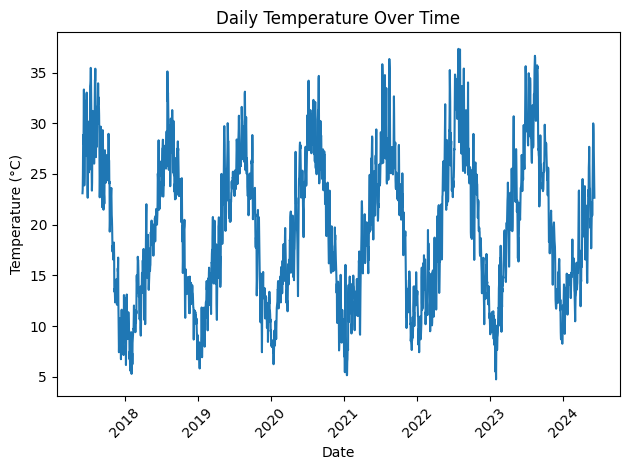

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
# 1. Temperature Over Time

plt.figure()
plt.plot(morged_meteo['TIMESTAMP'], morged_meteo['Temperature'])
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

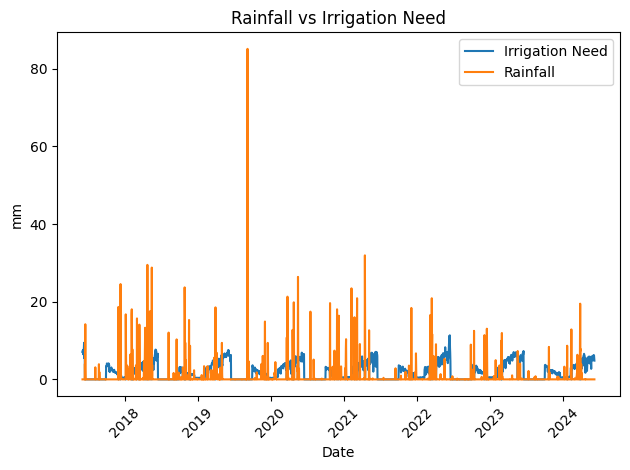

In [44]:
# 3. Rainfall vs Irrigation Need
plt.figure()
plt.plot(morged_meteo['TIMESTAMP'], morged_meteo["Besoin_irrigation"], label="Irrigation Need")
plt.plot(morged_meteo['TIMESTAMP'], morged_meteo['Pluie'], label="Rainfall")
plt.title("Rainfall vs Irrigation Need")
plt.xlabel('Date')
plt.ylabel('mm')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# General Correlation Heatmap

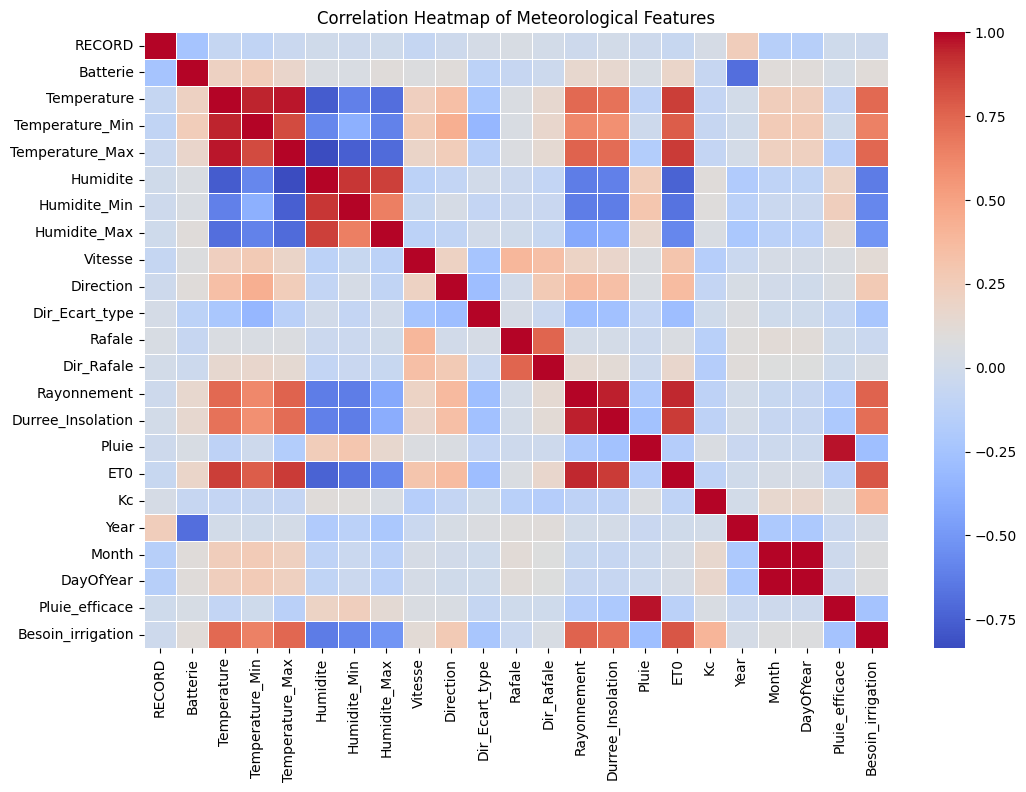

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = morged_meteo.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Meteorological Features")
plt.show()


# Correlation Specifically with Irrigation Need

In [109]:
# Focus on which features affect irrigation need
target_corr = corr_matrix["Besoin_irrigation"].sort_values(ascending=False)

print("Correlation with Irrigation Need (Descending):")
print(target_corr)


Correlation with Irrigation Need (Descending):
Besoin_irrigation    1.000000
ET0                  0.805549
Rayonnement          0.761280
Temperature_Max      0.746326
Temperature          0.737994
Durree_Insolation    0.719508
Temperature_Min      0.645047
Kc                   0.401808
Direction            0.269015
Vitesse              0.120985
Batterie             0.104702
DayOfYear            0.069631
Month                0.067862
Dir_Rafale           0.040272
Year                 0.023035
RECORD              -0.021303
Rafale              -0.045344
Dir_Ecart_type      -0.226532
Pluie_efficace      -0.254750
Pluie               -0.277654
Humidite_Max        -0.516187
Humidite_Min        -0.579249
Humidite            -0.632501
Name: Besoin_irrigation, dtype: float64


## Features Selection

Encoding categorical variables

Correlation Feature

In [110]:
morged_meteo = morged_meteo.drop(columns=['TIMESTAMP','RECORD','Batterie','Culture'])

In [111]:
def correlation_features(df, target):
    return df.corr()[target].sort_values(ascending=False)

Mutual Information Ranking

In [112]:
from sklearn.feature_selection import mutual_info_regression

def mutual_info_features(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    mi = mutual_info_regression(X, y)
    return pd.Series(mi, index=X.columns).sort_values(ascending=False)

Random Forest Feature Importance

In [113]:
from sklearn.ensemble import RandomForestRegressor

def rf_feature_importance(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X, y)
    return pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

Recursive Feature Elimination (RFE)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

def rfe_selection(df, target, num_features=10):
    X = df.drop(columns=[target])
    y = df[target]
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=num_features)
    rfe.fit(X, y)
    ranking = pd.Series(rfe.ranking_, index=X.columns)
    return ranking.sort_values()

In [115]:

def feature_selection_pipeline(df, target='Besoin_irrigation', k_best=10):


    corr = correlation_features(df, target)
    mi = mutual_info_features(df, target)
    rf = rf_feature_importance(df, target)
    rfe = rfe_selection(df, target, num_features=k_best)

    results = pd.DataFrame({
        'Correlation': corr,
        'Mutual_Info': mi,
        'RF_Importance': rf,
        'RFE_Rank': rfe
    })

    top_features = rf.head(k_best).index.tolist()
    selected_df = df[top_features + [target]]

    return selected_df, results.sort_values(by='RF_Importance', ascending=False)


In [118]:
selected_df, ranking = feature_selection_pipeline(morged_meteo, target='Besoin_irrigation', k_best=10)

print("🎯 Selected Features:", selected_df.columns.tolist())
ranking.head(12)

🎯 Selected Features: ['ET0', 'Kc', 'Rayonnement', 'Pluie', 'Pluie_efficace', 'Durree_Insolation', 'DayOfYear', 'Temperature', 'Temperature_Max', 'Humidite', 'Besoin_irrigation']


,Correlation,Mutual_Info,RF_Importance,RFE_Rank
ET0,0.805549,0.959414,0.497026,1.0
Kc,0.401808,0.247942,0.238401,1.0
Rayonnement,0.761280,0.735530,0.204937,11.0
Pluie,-0.277654,0.180075,0.027869,1.0
Pluie_efficace,-0.254750,0.128733,0.018577,1.0
Durree_Insolation,0.719508,0.691191,0.005973,1.0
DayOfYear,0.069631,1.098647,0.002392,6.0
Temperature,0.737994,0.494892,0.000864,1.0
Temperature_Max,0.746326,0.468783,0.000836,1.0
Humidite,-0.632501,0.351365,0.000604,4.0


## Prepare data for Rnn



In [55]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

def create_sequences(data, target_column, time_steps):
    """
    Create sequences of features and target values for time series forecasting.

    Args:
        data (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
        time_steps (int): The number of look-back time steps.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - X: Sequences of features (samples, time_steps, features).
               - y: Corresponding target values (samples,).
    """
    X, y = [], []
    for i in range(len(data) - time_steps):
        features = data.drop(columns=[target_column]).iloc[i:(i + time_steps)].values
        target = data[target_column].iloc[i + time_steps]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

# Apply the function to the selected_df
time_steps = 7  # Using a look-back window of 7 days
X_rnn, y_rnn = create_sequences(selected_df, 'Besoin_irrigation', time_steps)

print("Shape of X_rnn:", X_rnn.shape)
print("Shape of y_rnn:", y_rnn.shape)


Shape of X_rnn: (2550, 7, 10)
Shape of y_rnn: (2550,)


## Split data





Split the prepared data into training and testing sets using train_test_split.



In [119]:
def create_sequences_gliss(data, target_column, time_steps=7, step_size=1):
    """
    Create sequences with sliding window (gliss) of specified step size.

    Args:
        data (pd.DataFrame): Input DataFrame
        target_column (str): Name of target column
        time_steps (int): Look-back window size (7 days)
        step_size (int): Sliding step size (1 day)

    Returns:
        tuple: X, y sequences
    """
    X, y = [], []
    for i in range(0, len(data) - time_steps, step_size):  # Step by step_size
        features = data.drop(columns=[target_column]).iloc[i:(i + time_steps)].values
        target = data[target_column].iloc[i + time_steps]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

def prepare_data_for_lstm(df, target_column, time_steps=7, step_size=1, test_size=0.2, val_size=0.2, scale_features=True):
    """
    Prepare data for LSTM with 7-day window and 1-step sliding.

    Args:
        df (pd.DataFrame): Input DataFrame
        target_column (str): Name of target column
        time_steps (int): Look-back window size (7 days)
        step_size (int): Sliding step size (1 day)
        test_size (float): Proportion of data for testing
        val_size (float): Proportion of training data for validation
        scale_features (bool): Whether to scale features

    Returns:
        tuple: X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y
    """
    # Create sequences with sliding window
    X, y = create_sequences_gliss(df, target_column, time_steps, step_size)

    # Initialize scalers
    scaler_X, scaler_y = None, None

    if scale_features:
        # Scale features
        scaler_X = StandardScaler()
        X_reshaped = X.reshape(-1, X.shape[-1])
        X_scaled = scaler_X.fit_transform(X_reshaped)
        X = X_scaled.reshape(X.shape)

        # Scale target
        scaler_y = StandardScaler()
        y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Split data (maintaining temporal order)
    total_size = len(X)
    test_split = int(total_size * (1 - test_size))
    val_split = int(test_split * (1 - val_size))

    X_train = X[:val_split]
    X_val = X[val_split:test_split]
    X_test = X[test_split:]

    y_train = y[:val_split]
    y_val = y[val_split:test_split]
    y_test = y[test_split:]

    print(f"Data shapes (Window: {time_steps} days, Step: {step_size} day):")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"Total sequences: {len(X)}")

    return X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y


Define the architecture of the LSTM model using Sequential, LSTM, and Dense layers and print the model summary.



In [120]:

def lstm_model(input_shape, units=64, dropout_rate=0.2, l2_reg=0.01):
    """
    Create LSTM model with multiple layers and regularization.

    Args:
        input_shape (tuple): Shape of input data (time_steps, features)
        units (int): Number of units in first LSTM layer
        dropout_rate (float): Dropout rate
        l2_reg (float): L2 regularization factor

    Returns:
        model: Compiled Keras model
    """
    model = Sequential([
        LSTM(units=units, activation='tanh',
             return_sequences=True,
             kernel_regularizer=l2(l2_reg),
             input_shape=input_shape),
        Dropout(dropout_rate),
        BatchNormalization(),

        LSTM(units=units//2, activation='tanh',
             kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        BatchNormalization(),

        Dense(units=32, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate/2),
        Dense(units=1)
    ])

    return model



## Train lstm model




Compile and train the LSTM model as requested by the subtask instructions.



In [121]:
def train_lstm_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32, learning_rate=0.001):
    """
    Train the LSTM model with callbacks and monitoring.

    Args:
        model: Keras model
        X_train, y_train: Training data
        X_val, y_val: Validation data
        epochs (int): Maximum number of epochs
        batch_size (int): Batch size for training
        learning_rate (float): Initial learning rate

    Returns:
        tuple: trained_model, training_history
    """
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_absolute_percentage_error']
    )

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            'best_lstm_model.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train model
    print("Starting model training...")
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1,
        shuffle=False
    )

    # Load best model
    from tensorflow.keras.models import load_model
    try:
        best_model = load_model('best_lstm_model.keras')
        print("Loaded best model from checkpoint")
    except:
        print("Could not load best model, using final model instead")
        best_model = model

    return best_model, history

In [122]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, scaler_y=None):
    """
    Evaluate model performance on train, validation, and test sets.
    """
    def safe_predict(model, X, dataset_name):
        if len(X) == 0:
            print(f"Warning: {dataset_name} is empty, skipping prediction")
            return np.array([])
        return model.predict(X, verbose=0)

    # Make predictions
    y_train_pred = safe_predict(model, X_train, "Training")
    y_val_pred = safe_predict(model, X_val, "Validation")
    y_test_pred = safe_predict(model, X_test, "Test")

    # Inverse transform if scaler is provided
    if scaler_y is not None:
        if len(y_train) > 0:
            y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
            y_train_pred = scaler_y.inverse_transform(y_train_pred).flatten()

        if len(y_val) > 0:
            y_val = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()
            y_val_pred = scaler_y.inverse_transform(y_val_pred).flatten()

        if len(y_test) > 0:
            y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
            y_test_pred = scaler_y.inverse_transform(y_test_pred).flatten()

    # Calculate improved metrics
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    def calculate_improved_metrics(y_true, y_pred, dataset_name):
        if len(y_true) == 0 or len(y_pred) == 0:
            print(f"\n{dataset_name} Metrics: No data available")
            return

        r2 = r2_score(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)

        # FIXED: Use only non-zero values for MAPE
        non_zero_mask = y_true > 0
        if np.any(non_zero_mask):
            mape_non_zero = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
        else:
            mape_non_zero = 0

        # Symmetric MAPE (handles zeros better)
        smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100

        # Accuracy for zero/non-zero classification
        true_binary = (y_true > 0)
        pred_binary = (y_pred > 0.1)  # Small threshold for prediction
        binary_accuracy = np.mean(true_binary == pred_binary) * 100

        print(f"\n{dataset_name} Metrics:")
        print(f"R² Score: {r2:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE (non-zero only): {mape_non_zero:.2f}%")
        print(f"sMAPE: {smape:.2f}%")
        print(f"Binary Accuracy: {binary_accuracy:.2f}%")
        print(f"Zero/Non-zero distribution:")
        print(f"  - Actual zeros: {(y_true == 0).sum()} ({(y_true == 0).mean()*100:.1f}%)")
        print(f"  - Predicted zeros: {(y_pred < 0.1).sum()} ({(y_pred < 0.1).mean()*100:.1f}%)")

        return r2, rmse, mae, mape_non_zero, smape, binary_accuracy

    print("=== MODEL EVALUATION ===")
    train_metrics = calculate_improved_metrics(y_train, y_train_pred, "Training")
    val_metrics = calculate_improved_metrics(y_val, y_val_pred, "Validation")
    test_metrics = calculate_improved_metrics(y_test, y_test_pred, "Test")  # FIXED: y_test_pred instead of y_test_test

    return {
        'train': {'true': y_train, 'pred': y_train_pred, 'metrics': train_metrics},
        'val': {'true': y_val, 'pred': y_val_pred, 'metrics': val_metrics},
        'test': {'true': y_test, 'pred': y_test_pred, 'metrics': test_metrics}
    }

In [123]:
def plot_training_results(history, evaluation_results):
    """
    Plot training history and prediction results.

    Args:
        history: Training history object
        evaluation_results (dict): Evaluation results from evaluate_model
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Training history
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_ylabel('Loss (MSE)')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    axes[0, 1].plot(history.history['mean_absolute_error'], label='Training MAE')
    axes[0, 1].plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    axes[0, 1].set_title('Mean Absolute Error')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Predictions vs Actual
    datasets = ['train', 'val', 'test']
    titles = ['Training', 'Validation', 'Test']

    for i, (dataset, title) in enumerate(zip(datasets, titles)):
        y_true = evaluation_results[dataset]['true']
        y_pred = evaluation_results[dataset]['pred']

        if len(y_true) > 0 and len(y_pred) > 0:
            axes[1, i].scatter(y_true, y_pred, alpha=0.6)
            min_val = min(y_true.min(), y_pred.min())
            max_val = max(y_true.max(), y_pred.max())
            axes[1, i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
            axes[1, i].set_xlabel('Actual Values')
            axes[1, i].set_ylabel('Predicted Values')
            axes[1, i].set_title(f'{title} - Predictions vs Actual')
            axes[1, i].grid(True)
        else:
            axes[1, i].text(0.5, 0.5, f'No {title} Data',
                           horizontalalignment='center', verticalalignment='center',
                           transform=axes[1, i].transAxes, fontsize=14)
            axes[1, i].set_title(f'{title} - No Data Available')

    plt.tight_layout()
    plt.show()

In [124]:
def run_lstm_pipeline(df, target_column, time_steps=7,step_size=1, test_size=0.2, val_size=0.2,
                     epochs=100, batch_size=32, learning_rate=0.001):
    """
    Run the complete LSTM pipeline from data preparation to evaluation.

    Args:
        df (pd.DataFrame): Input DataFrame
        target_column (str): Name of target column
        time_steps (int): Look-back window size
        test_size (float): Test set proportion
        val_size (float): Validation set proportion
        epochs (int): Training epochs
        batch_size (int): Batch size
        learning_rate (float): Learning rate

    Returns:
        tuple: trained_model, history, evaluation_results
    """
    # 0. Analyze target variable
    print("Step 0: Analyzing target variable...")
    analyze_target_variable(df, target_column)

    # 1. Prepare data
    print("\nStep 1: Preparing data...")
    X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y = prepare_data_for_lstm(
        df=df,
        target_column=target_column,
        time_steps=time_steps,
        step_size=step_size,
        test_size=test_size,
        val_size=val_size,
        scale_features=True
    )

    # 2. Create model
    print("\nStep 2: Creating model...")
    model = lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    model.summary()

    # 3. Train model
    print("\nStep 3: Training model...")
    trained_model, history = train_lstm_model(
        model, X_train, y_train, X_val, y_val,
        epochs=epochs,
        batch_size=batch_size,
        learning_rate=learning_rate
    )



    return trained_model, history

Step 0: Analyzing target variable...
=== TARGET VARIABLE ANALYSIS ===
Target column: Besoin_irrigation
Number of samples: 2557
Mean: 2.9039
Std: 1.6666
Min: 0.0000
Max: 7.2576
Median: 2.3361
Zero values: 79 (3.09%)
Near-zero values (<0.001): 79 (3.09%)


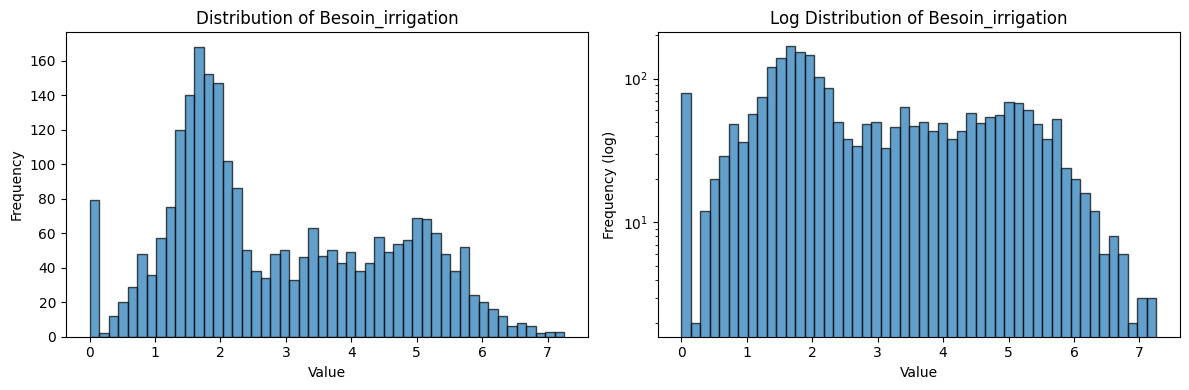


Step 1: Preparing data...
Data shapes (Window: 7 days, Step: 1 day):
X_train: (1841, 7, 10), y_train: (1841,)
X_val: (326, 7, 10), y_val: (326,)
X_test: (383, 7, 10), y_test: (383,)
Total sequences: 2550

Step 2: Creating model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 7, 64)          │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 7, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,089 (129.25 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 192 (768.00 B)


Step 3: Training model...
Starting model training...
Epoch 1/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0455 - mean_absolute_error: 1.0890 - mean_absolute_percentage_error: 261.5692
Epoch 1: val_loss improved from inf to 2.29671, saving model to best_lstm_model.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 3.0326 - mean_absolute_error: 1.0847 - mean_absolute_percentage_error: 263.1559 - val_loss: 2.2967 - val_mean_absolute_error: 0.8887 - val_mean_absolute_percentage_error: 88.2282 - learning_rate: 0.0010
Epoch 2/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3621 - mean_absolute_error: 0.8781 - mean_absolute_percentage_error: 247.7320
Epoch 2: val_loss improved from 2.29671 to 2.06802, saving model to best_lstm_model.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3542 - mean_absolute_error: 0.8755 - mean_absolute_percentage_error: 249.5122 - val_loss: 2.0680 - val_mean_absolute_error: 0.8261 - val_mean_absolute_percentage_error: 82.7946 - learning_r

In [125]:
# Run the complete pipeline
trained_model, history = run_lstm_pipeline(
    df=selected_df,
    target_column='Besoin_irrigation',
    time_steps=7,
    test_size=0.15,
    val_size=0.15,
    epochs=100,
    batch_size=32,
    learning_rate=0.001
)

In [126]:
# Re-prepare data to get X_train, y_train, etc.
X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y = prepare_data_for_lstm(
    df=selected_df,
    target_column='Besoin_irrigation',
    time_steps=7,
    test_size=0.2,
    val_size=0.2
)

# Now evaluate
results = evaluate_model(
    trained_model,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    scaler_y
)

Data shapes (Window: 7 days, Step: 1 day):
X_train: (1632, 7, 10), y_train: (1632,)
X_val: (408, 7, 10), y_val: (408,)
X_test: (510, 7, 10), y_test: (510,)
Total sequences: 2550
=== MODEL EVALUATION ===

Training Metrics:
R² Score: 0.4689
RMSE: 1.2052
MAE: 0.9571
MAPE (non-zero only): 41.69%
sMAPE: 38.89%
Binary Accuracy: 96.51%
Zero/Non-zero distribution:
  - Actual zeros: 57 (3.5%)
  - Predicted zeros: 0 (0.0%)

Validation Metrics:
R² Score: 0.4949
RMSE: 1.2078
MAE: 0.9621
MAPE (non-zero only): 43.46%
sMAPE: 38.52%
Binary Accuracy: 97.06%
Zero/Non-zero distribution:
  - Actual zeros: 12 (2.9%)
  - Predicted zeros: 0 (0.0%)

Test Metrics:
R² Score: 0.5223
RMSE: 1.1584
MAE: 0.9264
MAPE (non-zero only): 38.69%
sMAPE: 34.51%
Binary Accuracy: 98.04%
Zero/Non-zero distribution:
  - Actual zeros: 10 (2.0%)
  - Predicted zeros: 0 (0.0%)



Step 5: Plotting results...


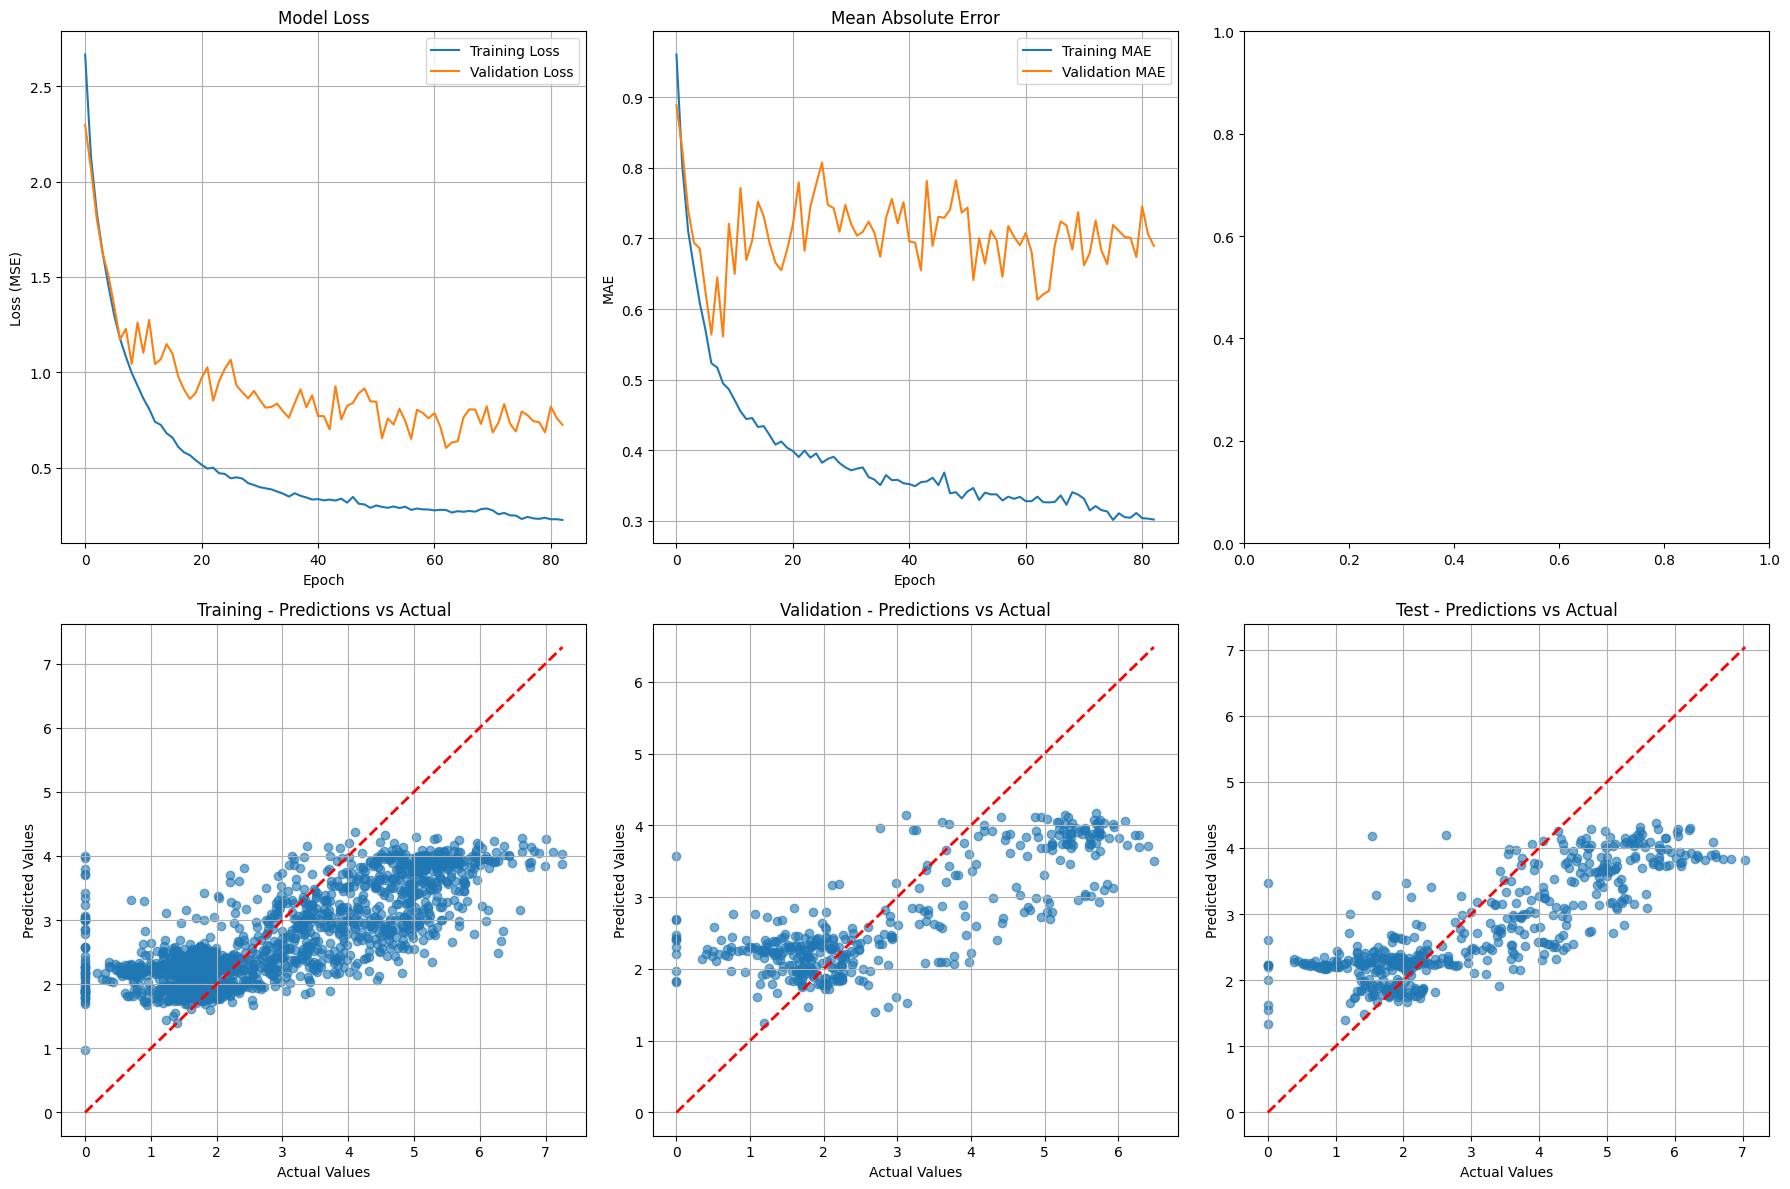

In [128]:
# 5. Plot results
print("\nStep 5: Plotting results...")
plot_training_results(history, results)


In [129]:
# 6. Save final model
trained_model.save('final_trained_lstm_model.h5')
print("\nFinal model saved as 'final_trained_lstm_model.h5'")


Final model saved as 'final_trained_lstm_model.h5'
